<a href="https://colab.research.google.com/github/bhavya1346/ip/blob/main/income_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


SVM Accuracy: 0.8520
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4942
           1       0.77      0.56      0.64      1571

    accuracy                           0.85      6513
   macro avg       0.82      0.75      0.78      6513
weighted avg       0.85      0.85      0.84      6513



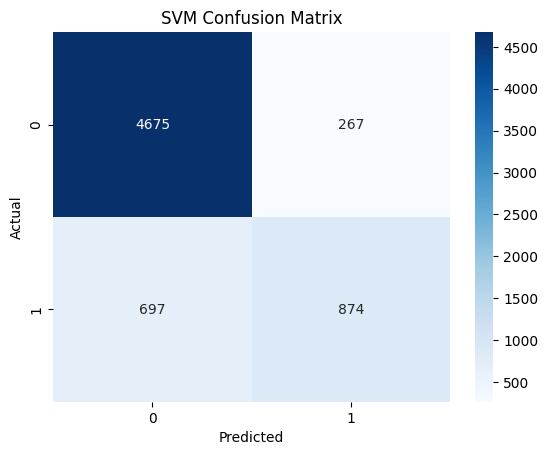


Random Forest Accuracy: 0.8623
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.75      0.64      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513



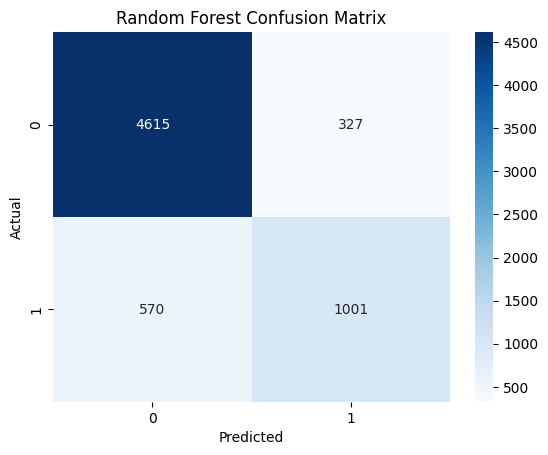


Logistic Regression Accuracy: 0.8247
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.71      0.46      0.56      1571

    accuracy                           0.82      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513



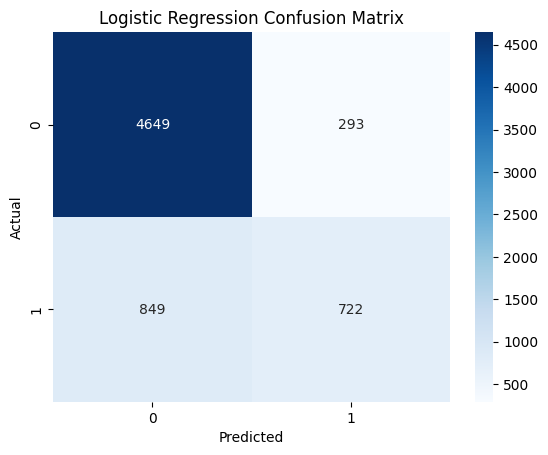

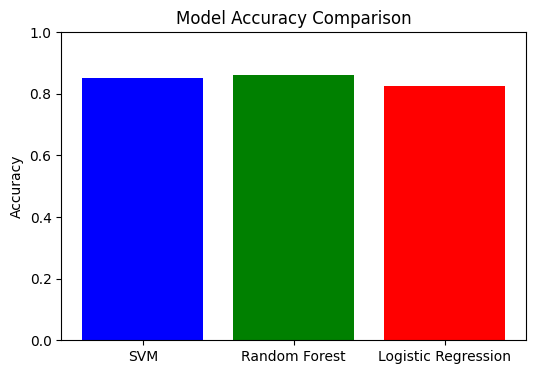


Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 20}
Best CV Score: 0.8618705622116715

Sample features:
        age  worktype   fnlwt  education  education_number  marital_status  \
14160   27         4  160178         15                10               0   

       occupation  relatioship_status  race  sex  capital_gain  capital_loss  \
14160           1                   1     4    0             0             0   

       hours_per_week  native_country  
14160              38              39  
Predicted Income (0=<=50K, 1=>50K): 0


In [2]:
# --- Install and Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# --- Load Dataset ---
df = pd.read_csv('/content/adult - Copy.csv')

# Drop unwanted columns (from CSV issue)
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col or "''" in col], errors='ignore')
df = df.dropna()

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features (X) and Target (y)
X = df.drop('income', axis=1)
y = df['income']

# Train-Test Split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale for SVM and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train Models ---
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=500)
}

accuracies = {}

for name, model in models.items():
    if name in ['SVM', 'Logistic Regression']:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc

    # Print Results
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))

    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# --- Accuracy Bar Chart ---
plt.figure(figsize=(6,4))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue','green','red'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0,1)
plt.show()

# --- RandomizedSearchCV for Random Forest ---
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier()
rs = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=3, random_state=42)
rs.fit(X_train, y_train)
print("\nBest Random Forest Params:", rs.best_params_)
print("Best CV Score:", rs.best_score_)

# --- Predict for Single Sample ---
sample = X_test.iloc[0:1]
sample_scaled = scaler.transform(sample)
predicted = models['Random Forest'].predict(sample)
print("\nSample features:\n", sample)
print("Predicted Income (0=<=50K, 1=>50K):", predicted[0])